In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
def pre_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape[0], gray.shape[1]
    pre_lbp = np.zeros((rows, cols), dtype=np.uint8)  
    return gray, rows, cols, pre_lbp


def calculate_lbp_clockwise(image):
    gray, rows, cols, lbp_clockwise = pre_lbp(image)
    for i in range(1, rows - 1):  # Hindari satu piksel di tepi atas dan bawah
        for j in range(1, cols - 1):  # Hindari satu piksel di tepi kiri dan kanan
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan searah jarum jam mulai dari 3 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j + 1], gray[i, j + 1],
                         gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1], gray[i - 1, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            lbp_clockwise[i - 1, j - 1] = code
    return lbp_clockwise

def calculate_lbp_anticlockwise(image):
    gray, rows, cols, lbp_anticlockwise = pre_lbp(image)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j - 1], gray[i - 1, j], gray[i - 1, j + 1],
                         gray[i, j + 1], gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            lbp_anticlockwise[i - 1, j - 1] = code
    
    return lbp_anticlockwise

    
def calculate_ncdblbp_clockwise(image):
    gray, rows, cols, ncdlbp_clockwise = pre_lbp(image)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan searah jarum jam mulai dari 3 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j + 1], gray[i, j + 1],
                         gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1], gray[i - 1, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_clockwise[i, j] = code
    
    return ncdlbp_clockwise


def calculate_ncdblbp_anticlockwise(image):
    gray, rows, cols, ncdlbp_anticlockwise = pre_lbp(image)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j - 1], gray[i, j - 1],
                         gray[i + 1, j - 1], gray[i + 1, j], gray[i + 1, j + 1],
                         gray[i, j + 1], gray[i - 1, j + 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_anticlockwise[i, j] = code
    
    return ncdlbp_anticlockwise


In [57]:
# Load gambar
image_path = 'img.jpg'
image = cv2.imread(image_path)

# Hitung hasil LBP
lbpac = calculate_lbp_anticlockwise(image)
lbpc = calculate_lbp_clockwise(image)

# Hitung hasil NCD-LBP
ncdac = calculate_ncdblbp_anticlockwise(image)
ncdc = calculate_ncdblbp_clockwise(image)

print(f'LBP\n==> AC: \n{lbpac}')
print(f'\n==> C: \n{lbpc}')

print(f'\n\nNCD-LBP\n==> AC: \n{ncdac}')
print(f'\n==> C: \n{ncdc}')


LBP
==> AC: 
[[225 225 225 ... 195   0   0]
 [225 225 227 ... 195   0   0]
 [ 97 225 227 ... 195   0   0]
 ...
 [128 128 128 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

==> C: 
[[240 240 240 ... 225   0   0]
 [240 240 241 ... 225   0   0]
 [176 240 241 ... 225   0   0]
 ...
 [ 64  64  64 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


NCD-LBP
==> AC: 
[[  0   0   0 ...   0   0   0]
 [  0  30  30 ... 143  15   0]
 [  0  30  30 ...  15  15   0]
 ...
 [  0 124 120 ... 255 255   0]
 [  0   4   4 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]

==> C: 
[[  0   0   0 ...   0   0   0]
 [  0 240 240 ... 227 225   0]
 [  0 240 240 ... 225 225   0]
 ...
 [  0 124  60 ... 255 255   0]
 [  0  64  64 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


In [66]:
df_ncdc = pd.DataFrame(ncdc)
df_ncdac = pd.DataFrame(ncdac)

df_ncdc.to_csv('ncdc.csv')
df_ncdac.to_csv('ncdac.csv')

df_ncdac.head()

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,30,30,30,255,225,0,254,225,225,...,240,152,15,15,31,222,141,143,15,0
2,0,30,30,31,255,225,33,246,225,225,...,192,0,15,63,31,30,143,15,15,0
3,0,26,30,31,255,249,225,208,225,225,...,129,7,55,126,28,15,15,15,15,0
4,0,8,30,30,110,244,225,128,231,225,...,143,231,115,30,15,15,143,15,143,0


In [67]:
df_lbpc = pd.DataFrame(lbpc)
df_lbpac = pd.DataFrame(lbpac)

df_lbpc.to_csv('lbpc.csv')
df_lbpac.to_csv('lbpac.csv')

df_lbpac.head()

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,225,225,225,255,30,0,253,30,30,30,...,100,195,195,227,237,198,199,195,0,0
1,225,225,227,255,30,18,189,30,30,30,...,0,195,243,227,225,199,195,195,0,0
2,97,225,227,255,126,30,44,30,30,30,...,131,179,249,224,195,195,195,195,0,0
3,64,225,225,217,188,30,4,159,30,62,...,159,59,225,195,195,199,195,199,0,0
4,195,225,225,255,28,30,6,159,30,60,...,255,110,64,195,195,227,231,231,0,0


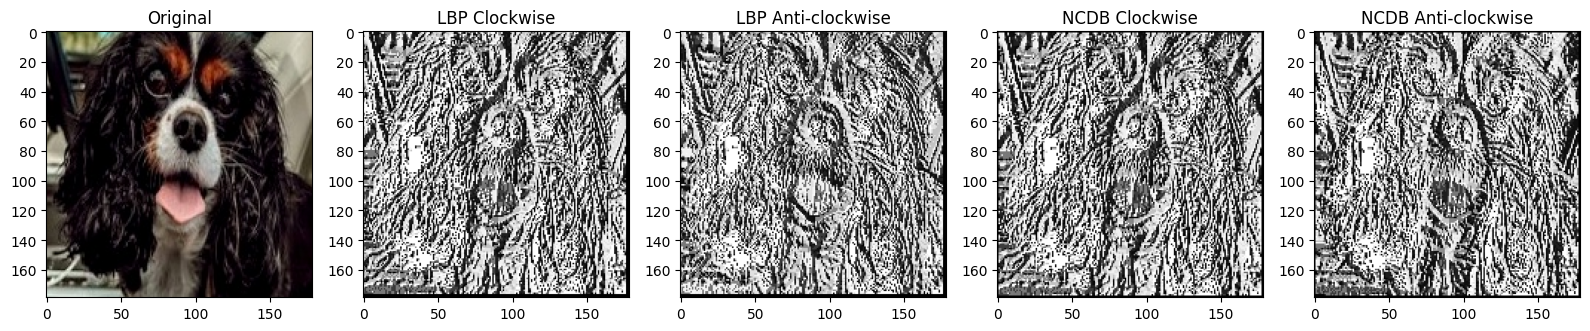

In [64]:
# Menampilkan gambar dalam grid 1 baris dan 3 kolom
plt.figure(figsize=(16, 4))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Clockwise Result
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(lbpc, cv2.COLOR_BGR2RGB))
plt.title('LBP Clockwise')

# Anti-clockwise Result
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(lbpac, cv2.COLOR_BGR2RGB))
plt.title('LBP Anti-clockwise')

# Clockwise Result
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(ncdc, cv2.COLOR_BGR2RGB))
plt.title('NCDB Clockwise')

# Anti-clockwise Result
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(ncdac, cv2.COLOR_BGR2RGB))
plt.title('NCDB Anti-clockwise')

plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan gambar dalam grid 1 baris dan 3 kolom
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Clockwise Result
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(ncdc, cv2.COLOR_BGR2RGB))
plt.title('Clockwise')

# Anti-clockwise Result
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(ncdac, cv2.COLOR_BGR2RGB))
plt.title('Anti-clockwise')

plt.tight_layout()
plt.show()